In [12]:
import pandas as pd
from ast import literal_eval

In [13]:
movies_metadata = pd.read_csv("data/movies_metadata.csv")
links_small = pd.read_csv("data/links_small.csv")
movies_keywords = pd.read_csv("data/keywords.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\2417491277.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv("data/movies_metadata.csv")


In [14]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
links_small.shape
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
movies_metadata = movies_metadata[movies_metadata['id'].isin(links_small.astype('str'))]

In [16]:
movies_metadata.head()
# ['id','title','genres','popularity','release_date']

movies = movies_metadata[['id','title','genres','popularity','release_date']]

In [17]:
movies

,id,title,genres,popularity,release_date
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,1995-10-30
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,1995-12-15
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,1995-12-22
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",8.387519,1995-02-10
...,...,...,...,...,...
40224,315011,Shin Godzilla,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9.285519,2016-07-29
40503,391698,The Beatles: Eight Days a Week - The Touring Y...,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",7.078301,2016-09-15
44821,10991,Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.480376,2000-07-08
44826,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.080108,2001-07-06


In [18]:
movies_keywords.shape
movies_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [19]:
# movies['id']
# movies_keywords['id'] = movies_keywords['id'].astype('str')
# movies_keywords['id']

movies = movies.merge(movies_keywords,on='id')


ValueError: You are trying to merge on object and int64 columns for key 'id'. If you wish to proceed you should use pd.concat

In [ ]:
movies.head()

,id,title,genres,popularity,release_date,keywords
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,1995-10-30,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,1995-12-15,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,1995-12-22,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",8.387519,1995-02-10,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
movies['genres'] = movies['genres'].fillna('[]') \
                    .apply(literal_eval) \
                    .apply(lambda x: sorted( i['name'] for i in x) if isinstance(x,list) else [])



In [ ]:
movies['genres']

0                             [Animation, Comedy, Family]
1                            [Adventure, Family, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9146      [Action, Adventure, Animation, Family, Fantasy]
9147    [Adventure, Animation, Family, Fantasy, Scienc...
9148    [Adventure, Animation, Family, Fantasy, Scienc...
9149                                      [Comedy, Drama]
9150                                      [Comedy, Drama]
Name: genres, Length: 9151, dtype: object

In [ ]:
movies['keywords'] = movies['keywords'].fillna('[]') \
                    .apply(literal_eval) \
                    .apply(lambda x: sorted( i['name'] for i in x) if isinstance(x,list) else [])
movies['keywords']

0       [boy, boy next door, friends, friendship, jeal...
1       [based on children's book, board game, disappe...
2       [best friend, duringcreditsstinger, fishing, o...
3       [based on novel, chick flick, divorce, interra...
4       [aging, baby, confidence, contraception, daugh...
                              ...                        
9146    [anime, based on tv series, based on video gam...
9147                            [celebi, pokémon, sequel]
9148                            [celebi, pokémon, sequel]
9149    [avalanche, dark comedy, family vacation, fema...
9150    [avalanche, dark comedy, family vacation, fema...
Name: keywords, Length: 9151, dtype: object

In [ ]:
movies['str_genres_keywords'] = movies['genres'] + movies['keywords'] 

In [ ]:
movies[['genres','keywords','str_genres_keywords']]

,genres,keywords,str_genres_keywords
0,"[Animation, Comedy, Family]","[boy, boy next door, friends, friendship, jeal...","[Animation, Comedy, Family, boy, boy next door..."
1,"[Adventure, Family, Fantasy]","[based on children's book, board game, disappe...","[Adventure, Family, Fantasy, based on children..."
2,"[Comedy, Romance]","[best friend, duringcreditsstinger, fishing, o...","[Comedy, Romance, best friend, duringcreditsst..."
3,"[Comedy, Drama, Romance]","[based on novel, chick flick, divorce, interra...","[Comedy, Drama, Romance, based on novel, chick..."
4,[Comedy],"[aging, baby, confidence, contraception, daugh...","[Comedy, aging, baby, confidence, contraceptio..."
...,...,...,...
9146,"[Action, Adventure, Animation, Family, Fantasy]","[anime, based on tv series, based on video gam...","[Action, Adventure, Animation, Family, Fantasy..."
9147,"[Adventure, Animation, Family, Fantasy, Scienc...","[celebi, pokémon, sequel]","[Adventure, Animation, Family, Fantasy, Scienc..."
9148,"[Adventure, Animation, Family, Fantasy, Scienc...","[celebi, pokémon, sequel]","[Adventure, Animation, Family, Fantasy, Scienc..."
9149,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family..."


In [ ]:
movies['str_genres_keywords'] = movies['str_genres_keywords'] \
                            .apply(lambda x: sorted(list(x))) \
                            .apply(lambda x: " ".join(x) if len(x) > 0 else None)

In [ ]:
movies[['str_genres_keywords']].iloc[0].values[0]

'Animation Comedy Family boy boy next door friends friendship jealousy new toy rivalry toy toy comes to life'

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9151 entries, 0 to 9150
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   9151 non-null   object
 1   title                9151 non-null   object
 2   genres               9151 non-null   object
 3   popularity           9151 non-null   object
 4   release_date         9151 non-null   object
 5   keywords             9151 non-null   object
 6   str_genres_keywords  9124 non-null   object
dtypes: object(7)
memory usage: 500.6+ KB


In [ ]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9151 entries, 0 to 9150
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9151 non-null   object        
 1   title                9151 non-null   object        
 2   genres               9151 non-null   object        
 3   popularity           9151 non-null   object        
 4   release_date         9151 non-null   datetime64[ns]
 5   keywords             9151 non-null   object        
 6   str_genres_keywords  9124 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 500.6+ KB


In [ ]:
movies['year'] = movies['release_date'].dt.year

In [ ]:
movies

,id,title,genres,popularity,release_date,keywords,str_genres_keywords,year
0,862,Toy Story,"[Animation, Comedy, Family]",21.946943,1995-10-30,"[boy, boy next door, friends, friendship, jeal...",Animation Comedy Family boy boy next door frie...,1995
1,8844,Jumanji,"[Adventure, Family, Fantasy]",17.015539,1995-12-15,"[based on children's book, board game, disappe...",Adventure Family Fantasy based on children's b...,1995
2,15602,Grumpier Old Men,"[Comedy, Romance]",11.7129,1995-12-22,"[best friend, duringcreditsstinger, fishing, o...",Comedy Romance best friend duringcreditsstinge...,1995
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",3.859495,1995-12-22,"[based on novel, chick flick, divorce, interra...",Comedy Drama Romance based on novel chick flic...,1995
4,11862,Father of the Bride Part II,[Comedy],8.387519,1995-02-10,"[aging, baby, confidence, contraception, daugh...",Comedy aging baby confidence contraception dau...,1995
...,...,...,...,...,...,...,...,...
9146,10991,Pokémon: Spell of the Unknown,"[Action, Adventure, Animation, Family, Fantasy]",6.480376,2000-07-08,"[anime, based on tv series, based on video gam...",Action Adventure Animation Family Fantasy anim...,2000
9147,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[Adventure, Animation, Family, Fantasy, Scienc...",6.080108,2001-07-06,"[celebi, pokémon, sequel]",Adventure Animation Family Fantasy Science Fic...,2001
9148,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[Adventure, Animation, Family, Fantasy, Scienc...",6.080108,2001-07-06,"[celebi, pokémon, sequel]",Adventure Animation Family Fantasy Science Fic...,2001
9149,265189,Force Majeure,"[Comedy, Drama]",12.165685,2014-08-15,"[avalanche, dark comedy, family vacation, fema...",Comedy Drama avalanche dark comedy family vaca...,2014


In [ ]:
# movies['popularity'].info()
movies['popularity'] = movies['popularity'].astype(float)

In [ ]:
movies['popularity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9151 entries, 0 to 9150
Series name: popularity
Non-Null Count  Dtype  
--------------  -----  
9151 non-null   float64
dtypes: float64(1)
memory usage: 71.6 KB


In [ ]:
movies['popularity'].describe()

count    9151.000000
mean        7.259378
std         9.353553
min         0.000004
25%         2.936654
50%         6.411782
75%         9.855113
max       547.488298
Name: popularity, dtype: float64

<Axes: xlabel='popularity', ylabel='Count'>

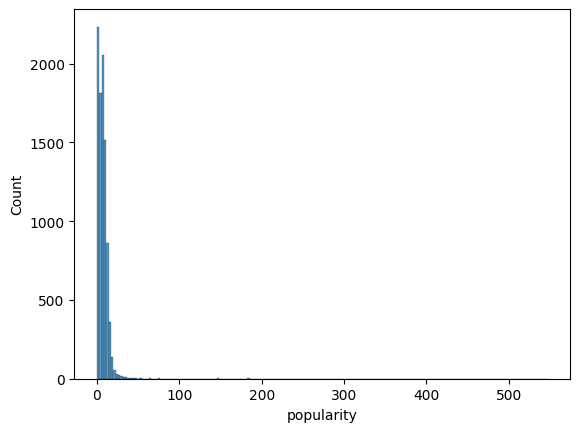

In [ ]:
import seaborn as sns
sns.histplot(movies['popularity'])


In [ ]:
import numpy as np
movies['popularity_log'] = np.log(movies['popularity'])
movies[['popularity','popularity_log']].describe()

,popularity,popularity_log
count,9151.000000,9151.000000
mean,7.259378,1.559346
std,9.353553,1.159141
min,0.000004,-12.429216
25%,2.936654,1.077271
50%,6.411782,1.858137
75%,9.855113,2.287990
max,547.488298,6.305341


<Axes: xlabel='popularity_log', ylabel='Count'>

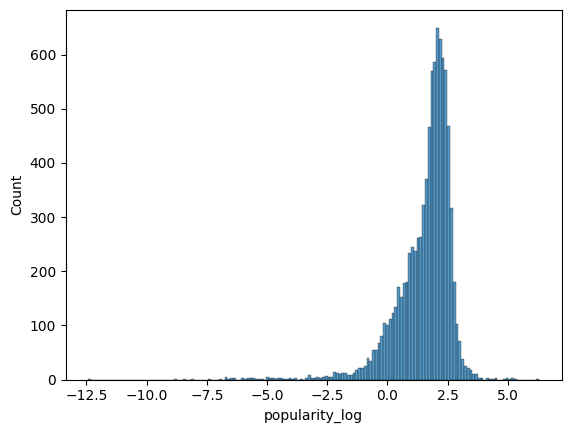

In [ ]:
sns.histplot(movies['popularity_log'])

In [ ]:
movies.isnull().sum()
movies = movies.dropna().reset_index(drop=True)

In [ ]:
movies.isnull().sum()

id                     0
title                  0
genres                 0
popularity             0
release_date           0
keywords               0
str_genres_keywords    0
year                   0
popularity_log         0
dtype: int64

### TF-IDF 기반 Contents Based Filtering


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_mat = tfidf_vectorizer.fit_transform(movies['str_genres_keywords'])
arr_tfidf = tfidf_mat.toarray()

arr_tfidf.shape

KeyError: 'str_genres_keywords'

### Euclidean Distances(유클리드 거리)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances


In [20]:
similarity_of_euclidean = euclidean_distances(arr_tfidf,arr_tfidf)
similarity_of_euclidean.shape


NameError: name 'arr_tfidf' is not defined